___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D5CE98","figure.facecolor":"#D5CE98"})
sns.set_context("poster",font_scale = .7)

import warnings
warnings.filterwarnings('ignore')

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Converting "Time" Column into Hours

In [4]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
timedelta

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
               ...      
284802   1 days 23:59:46
284803   1 days 23:59:47
284804   1 days 23:59:48
284805   1 days 23:59:48
284806   1 days 23:59:52
Name: Time, Length: 284807, dtype: timedelta64[ns]

In [5]:
df['Time_Hour']=(timedelta.dt.components.hours).astype(int)
df.drop('Time', axis=1, inplace=True)
columns=list(df.columns)
columns.remove('Time_Hour')
columns.insert(0, 'Time_Hour')

df=df.reindex(columns=columns)

In [6]:
df.head()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dropping Duplicated Rows

In [7]:
df.shape

(284807, 31)

In [8]:
df.duplicated().sum()

3885

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(280922, 31)

In [11]:
df.Class.value_counts()

0    280449
1       473
Name: Class, dtype: int64

#### Dropping the Rows "Amount = 0"

In [12]:
index_amount_0 = list(df[df['Amount']==0].index)

In [13]:
df = df.drop(index_amount_0)

In [14]:
df.shape

(279126, 31)

In [15]:
df.Class.value_counts()

0    278678
1       448
Name: Class, dtype: int64

#### What About Dropping Outliers?

In [16]:
# In this step let us see what would happen if we drop all the outliers!

In [17]:
dx=df.copy()


In [18]:
for i in dx.columns:
    q1, q3 = np.percentile(dx[i], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = np.where((dx[i] < lower_bound) | (dx[i] > upper_bound))
    outlier_index = list(dx.iloc[outliers].index)
    if i not in ['Time_Hour', 'Class']:     
        dx=dx.drop(outlier_index)
    

In [19]:
dx.shape

(108405, 31)

In [20]:
dx.Class.value_counts()

# If we remove all outliers, we lose 97% of class 1, which is not a reasonable option. 
# Furthermore, as we do not know what the features are, we cannot select and drop some of the outliers. 
# We decided not to drop outliers since we are unable to determine with certainty whether they are indeed outliers or not!

0    108393
1        12
Name: Class, dtype: int64

#### Describe of the Columns

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_Hour,279126.0,14.061753,5.821420,0.000000,10.000000,15.000000,19.000000,23.000000
V1,279126.0,-0.009090,1.949171,-56.407510,-0.924306,-0.005495,1.309789,2.454930
V2,279126.0,-0.004644,1.652604,-72.715728,-0.608565,0.065522,0.806685,22.057729
V3,279126.0,0.005568,1.506099,-48.325589,-0.879942,0.182841,1.029184,9.382558
V4,279126.0,-0.013545,1.406059,-5.683171,-0.858484,-0.028455,0.732766,16.875344
V5,279126.0,-0.005262,1.375292,-113.743307,-0.692788,-0.057505,0.606377,34.801666
V6,279126.0,-0.009371,1.323858,-26.160506,-0.769870,-0.277466,0.385605,73.301626
V7,279126.0,0.007304,1.228776,-43.557242,-0.548386,0.045457,0.576186,120.589494
V8,279126.0,-0.003082,1.180714,-73.216718,-0.210208,0.020401,0.322396,20.007208
V9,279126.0,-0.007498,1.094672,-13.320155,-0.650172,-0.056936,0.590383,15.594995


#### Info of the Columns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279126 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time_Hour  279126 non-null  int32  
 1   V1         279126 non-null  float64
 2   V2         279126 non-null  float64
 3   V3         279126 non-null  float64
 4   V4         279126 non-null  float64
 5   V5         279126 non-null  float64
 6   V6         279126 non-null  float64
 7   V7         279126 non-null  float64
 8   V8         279126 non-null  float64
 9   V9         279126 non-null  float64
 10  V10        279126 non-null  float64
 11  V11        279126 non-null  float64
 12  V12        279126 non-null  float64
 13  V13        279126 non-null  float64
 14  V14        279126 non-null  float64
 15  V15        279126 non-null  float64
 16  V16        279126 non-null  float64
 17  V17        279126 non-null  float64
 18  V18        279126 non-null  float64
 19  V19        279126 non-n

#### Correlation of the Columns

In [23]:
df.corr()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time_Hour,1.000000,-0.004117,0.008604,-0.023026,-0.032165,-0.034019,-0.016749,-0.011270,0.033271,-0.191624,...,-0.012019,-0.014195,0.006371,0.005464,-0.003533,0.001519,-0.008373,-0.007176,-0.007291,-0.016829
V1,-0.004117,1.000000,0.005442,-0.003085,0.003163,-0.007228,-0.004834,-0.012048,-0.005198,-0.004667,...,0.000080,-0.001193,0.000577,-0.004365,-0.003254,0.000299,-0.014924,-0.006146,-0.229540,-0.094036
V2,0.008604,0.005442,1.000000,0.005640,-0.004351,0.008986,-0.002453,0.006226,0.005105,0.003700,...,-0.004338,0.000897,-0.000259,0.001305,-0.000660,-0.000608,0.010705,-0.000148,-0.535246,0.083018
V3,-0.023026,-0.003085,0.005640,1.000000,-0.001361,0.000825,0.003470,-0.013419,-0.002778,-0.005175,...,0.001407,0.000097,0.002790,0.003544,0.002941,0.000463,-0.007575,-0.001330,-0.215341,-0.180868
V4,-0.032165,0.003163,-0.004351,-0.001361,1.000000,0.002115,0.000524,0.009539,0.002767,0.008154,...,-0.000265,-0.002859,-0.000770,0.003881,0.000824,-0.003858,0.001772,0.001386,0.103247,0.126388
V5,-0.034019,-0.007228,0.008986,0.000825,0.002115,1.000000,-0.010042,-0.008899,-0.002137,-0.000066,...,0.001207,0.000602,-0.000113,-0.004051,-0.003803,-0.000768,-0.007487,0.000951,-0.389806,-0.090037
V6,-0.016749,-0.004834,-0.002453,0.003470,0.000524,-0.010042,1.000000,0.005596,-0.002062,-0.002195,...,-0.000974,0.001190,0.000386,-0.006064,-0.001769,0.000595,0.000650,0.000207,0.221334,-0.042930
V7,-0.011270,-0.012048,0.006226,-0.013419,0.009539,-0.008899,0.005596,1.000000,-0.010545,-0.003693,...,0.003949,0.000028,0.005325,0.001347,0.000198,0.000782,-0.004327,0.001077,0.402351,-0.170152
V8,0.033271,-0.005198,0.005105,-0.002778,0.002767,-0.002137,-0.002062,-0.010545,1.000000,-0.001598,...,0.012602,-0.003310,0.006743,-0.002281,-0.000900,-0.000424,-0.000170,-0.000427,-0.105039,0.035052
V9,-0.191624,-0.004667,0.003700,-0.005175,0.008154,-0.000066,-0.002195,-0.003693,-0.001598,1.000000,...,0.000005,0.000523,-0.000549,-0.003124,-0.002681,0.006552,0.007114,0.006224,-0.042956,-0.090421


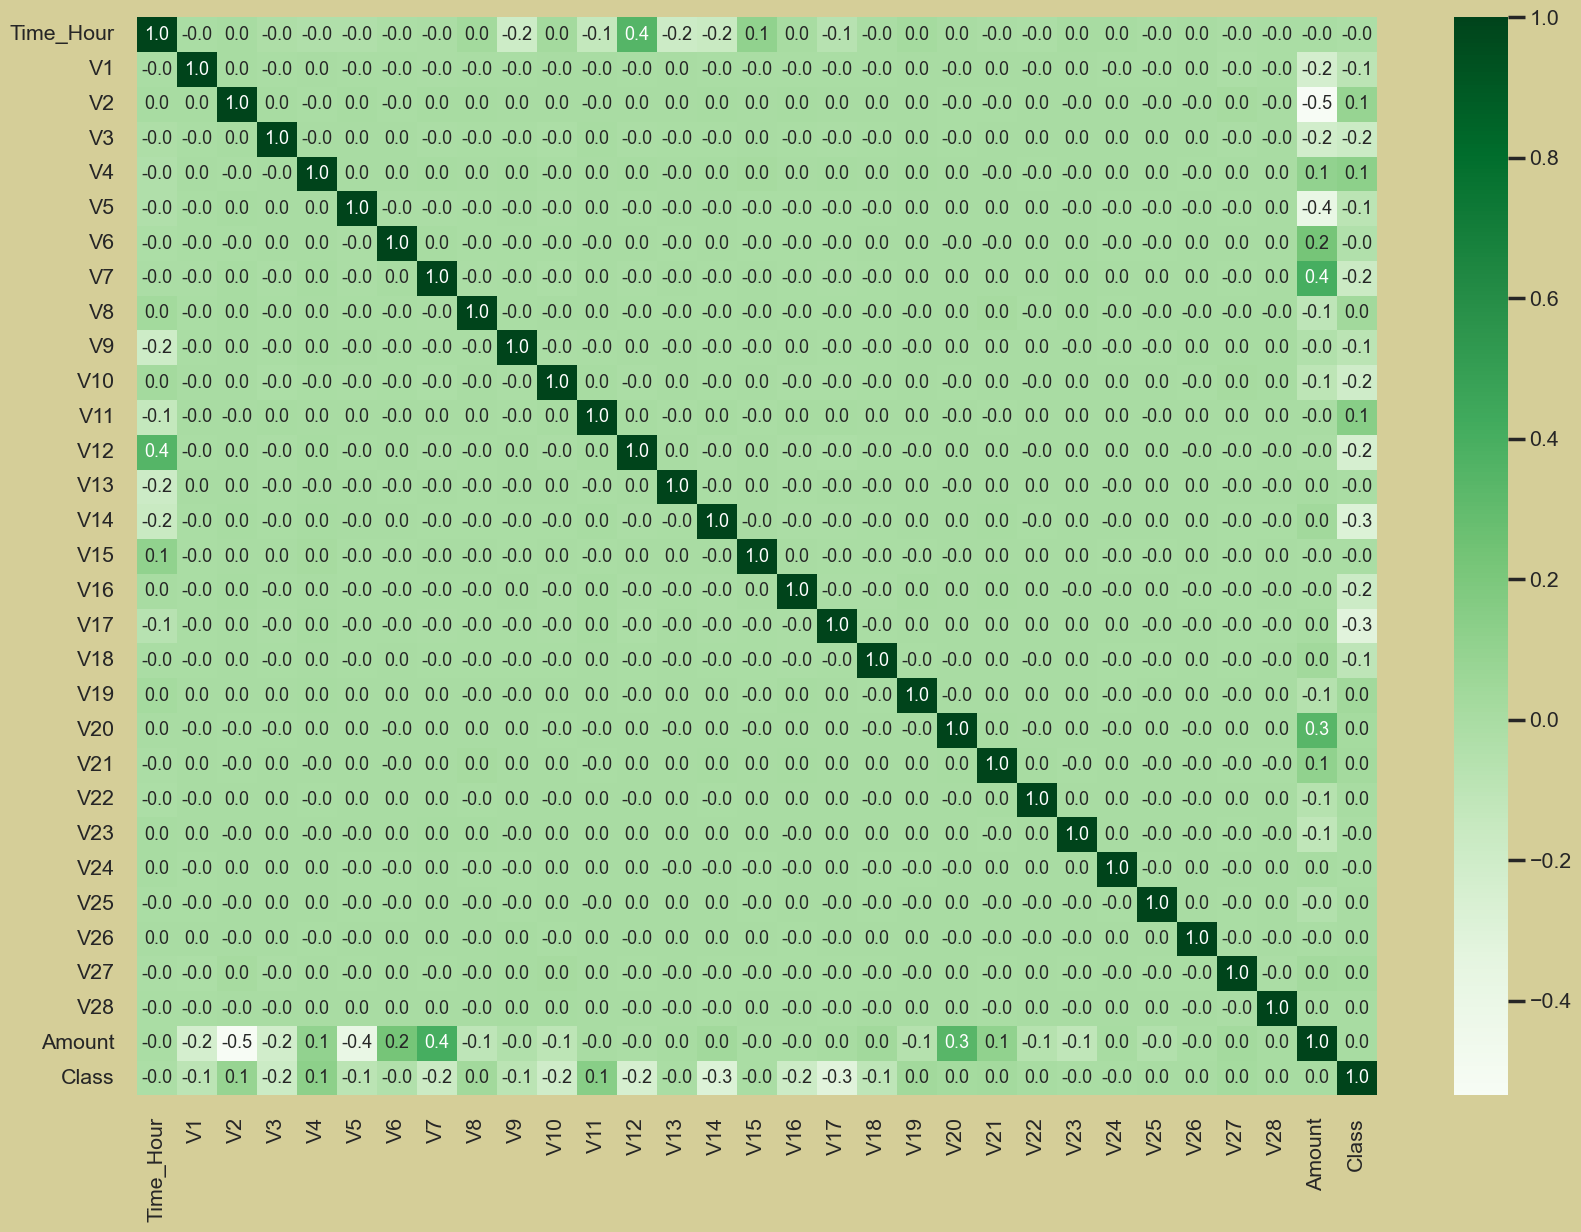

In [24]:
plt.figure(figsize=(20,14))
corr=df.corr()
sns.heatmap(corr,cmap='Greens', annot=True, fmt='.1f',  annot_kws={"fontsize":13});

### Exploratory Data Analysis

#### Distribution of "Class" Column

In [25]:
df.Class.value_counts()

# 1 = Frauds, 0 = Normal Transactions

0    278678
1       448
Name: Class, dtype: int64

In [215]:
plt.figure(figsize=(5,4))
fig = px.pie(df.Class.value_counts().reset_index(name='count'), values='count', names='index', color='index',
             title='0 & 1 Distribution In "Class" Feature',
             labels={'index':'Class', 'count': 'Count'},
            template='presentation', height=500, width=600,
            color_discrete_map={0:'#00441B',
                                 1:'#C65200'})

fig.update_traces(textinfo='label+percent', insidetextfont=dict(color='black', size=15), opacity=1,
                 outsidetextfont={'color':'black', 'size':13}, insidetextorientation='auto', hoverlabel={'align':'left', 'bgcolor':'black'})

fig.update_layout(
    font=dict(size=14),
    title_font_size=20
)

fig.show()

<Figure size 500x400 with 0 Axes>

#### Let's examine the data based on the 'Amount' column

In [27]:
df.head()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Mean-Median and Max Values of Amount by Class

In [28]:
df.groupby('Class')['Amount'].mean()

Class
0     89.634231
1    130.784353
Name: Amount, dtype: float64

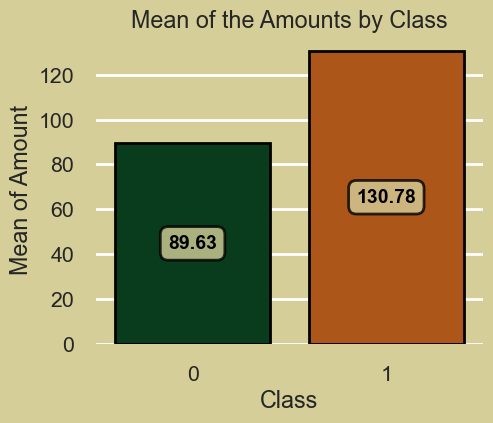

In [203]:
plt.figure(figsize=(5,4))
ax=sns.barplot(x=df.groupby('Class')['Amount'].mean().index, 
               y=df.groupby('Class')['Amount'].mean().values, palette=['#00441B','#C65200'],
              edgecolor='black')
plt.title('Mean of the Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Mean of Amount')
plt.box(False)
ax.bar_label(ax.containers[0], fmt="%.2f", label_type='center', 
             fontweight='bold', fontsize=14, color='black', 
             bbox=dict(boxstyle='round',facecolor='#D5CE98', alpha=0.8, edgecolor='black', pad=0.4))
plt.show()

In [30]:
df.groupby('Class')['Amount'].median()

Class
0    23.000
1    17.225
Name: Amount, dtype: float64

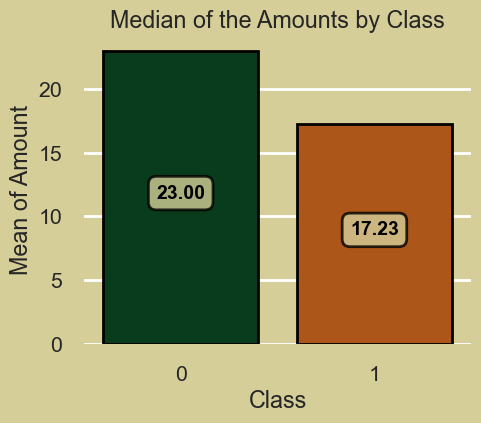

In [204]:
plt.figure(figsize=(5,4))
ax=sns.barplot(x=df.groupby('Class')['Amount'].median().index, 
               y=df.groupby('Class')['Amount'].median().values, palette=['#00441B','#C65200'],
              edgecolor='black')
plt.title('Median of the Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Mean of Amount')
plt.box(False)
ax.bar_label(ax.containers[0], fmt="%.2f", label_type='center', 
             fontweight='bold', fontsize=14, color='black', padding=3, 
             bbox=dict(boxstyle='round',facecolor='#D5CE98', alpha=0.8, edgecolor='black', pad=0.4))
plt.show()

In [32]:
df.groupby('Class')['Amount'].max()

Class
0    25691.16
1     2125.87
Name: Amount, dtype: float64

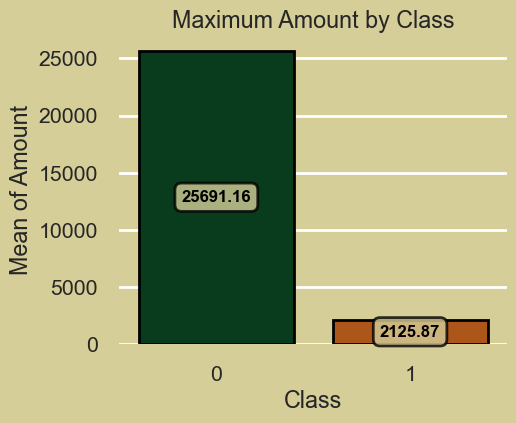

In [205]:
plt.figure(figsize=(5,4))
ax=sns.barplot(x=df.groupby('Class')['Amount'].max().index, 
               y=df.groupby('Class')['Amount'].max().values, palette=['#00441B','#C65200'],
              edgecolor='black')
plt.title('Maximum Amount by Class')
plt.xlabel('Class')
plt.ylabel('Mean of Amount')
plt.box(False)
ax.bar_label(ax.containers[0], fmt="%.2f", label_type='center', 
             fontweight='bold', fontsize=12, color='black', 
             bbox=dict(boxstyle='round',facecolor='#D5CE98', alpha=0.8, edgecolor='black', pad=0.4))
plt.show()

### The Scatter Plot View of the Distribution of Amount by Class

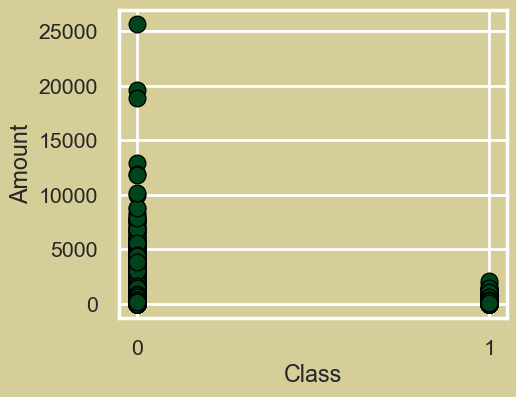

In [206]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df.Class, y= df.Amount, color='#00441B', edgecolor='black')
plt.xticks([0,1]);

### Amount Ranges in Class 1

In [35]:
my_dict={'Below 1 Dollar':146,
        'Between 1-10 Dollar':67,
        'Between 10-100 Dollar':110,
        'Between 100-500 Dollar':91,
        'Above 500 Dollar':34}
df_amount = pd.DataFrame(my_dict, index=[0])
df_amount

,Below 1 Dollar,Between 1-10 Dollar,Between 10-100 Dollar,Between 100-500 Dollar,Above 500 Dollar
0,146,67,110,91,34


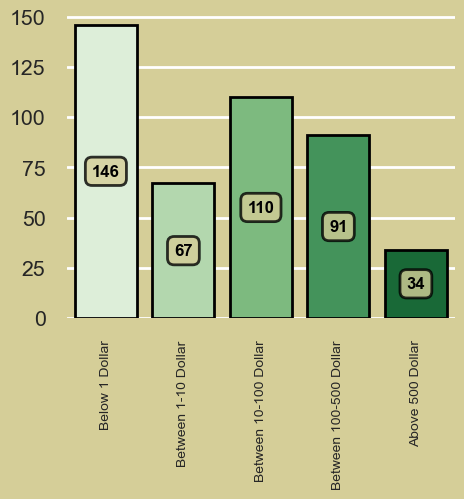

In [207]:
plt.figure(figsize=(5,4))
ax=sns.barplot(df_amount, edgecolor='black', palette='Greens')
plt.xticks(rotation=90, fontsize=10)
plt.box(False)
ax.bar_label(ax.containers[0], fmt="%.0f", label_type='center', 
             fontweight='bold', fontsize=12, color='black', 
             bbox=dict(boxstyle='round',facecolor='#D5CE98', alpha=0.8, edgecolor='black', pad=0.4))
plt.show()

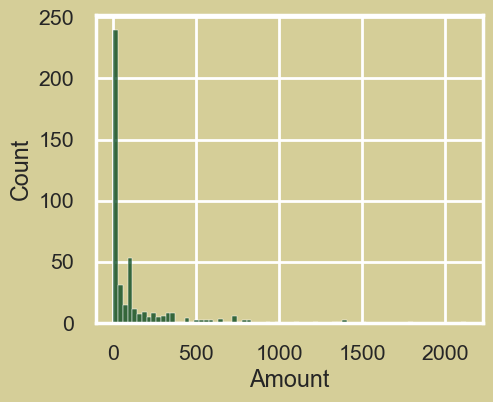

In [208]:
plt.figure(figsize=(5,4))
sns.histplot(df[df['Class']==1]['Amount'], color='#00441B');

## INSIGHT

There is no evidence that fraud transactions in Class 1 involve higher amounts of money; in fact, it appears that lower amounts of money are used. The fact that the maximum Amount value in Class 0 is higher than that in Class 1 supports this observation.

Taken together, these data suggest that fraudulent transactions are generally lower in value, which may indicate that fraudsters are attempting to avoid detection by conducting smaller transactions. The higher average Amount value in Class 1 may indicate that fraudsters are conducting a greater number of small transactions in order to obtain a higher total amount of money each of which are higher than average value of Class 0.

When we take a closer look at the Amount values in Class 1 rows, we can see the following:

   In 146 out of 448 "Class 1" rows, the spending amount is 1 dollar or less.
   In 67 out of 448 "Class 1" rows, the spending amount is between 1 dollar and 10 dollars.
   In 34 out of 448 "Class 1" rows, the spending amount is over 500 dollars.

Therefore, based on these data, we can say that about half of the fraudulent transactions are generally below 10 dollars in value and that fraudsters conduct smaller transactions to avoid suspicion. However, there is also some evidence to suggest that fraudsters are attempting to obtain higher amounts of money by conducting many small transactions.

### Analysing Means of All the Features by Class

In [38]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [39]:
print(legit.shape)
print(fraud.shape)

(278678, 31)
(448, 31)


In [40]:
legit.Amount.describe()

count    278678.000000
mean         89.634231
std         251.847310
min           0.010000
25%           6.060000
50%          23.000000
75%          79.000000
max       25691.160000
Name: Amount, dtype: float64

In [41]:
fraud.Amount.describe()

count     448.000000
mean      130.784353
std       265.688950
min         0.010000
25%         1.000000
50%        17.225000
75%       111.857500
max      2125.870000
Name: Amount, dtype: float64

In [42]:
df.groupby('Class').mean()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,14.065682,-0.001741,-0.010145,0.016490,-0.020671,-0.000297,-0.007092,0.015687,-0.004741,-0.003530,...,0.001664,-0.000836,-0.001570,0.000225,-0.002120,-0.003116,-0.000398,0.001555,0.000717,89.634231
1,11.618304,-4.580564,3.417146,-6.788438,4.418679,-3.093635,-1.426848,-5.207306,1.029125,-2.476185,...,0.387525,0.509190,0.091106,-0.103758,-0.107156,0.039386,0.044549,0.217839,0.076241,130.784353


In [43]:
df_class = df.drop(['Amount','Time_Hour'], axis=1).groupby('Class').mean().reset_index()

In [44]:
print(list(df_class.drop(['Class'], axis=1).columns))

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [45]:
melted = pd.melt(df_class, id_vars=['Class'], value_vars=list(df_class.drop('Class', axis=1).columns), var_name='Column')
melted

,Class,Column,value
0,0,V1,-0.001741
1,1,V1,-4.580564
2,0,V2,-0.010145
3,1,V2,3.417146
4,0,V3,0.016490
5,1,V3,-6.788438
6,0,V4,-0.020671
7,1,V4,4.418679
8,0,V5,-0.000297
9,1,V5,-3.093635


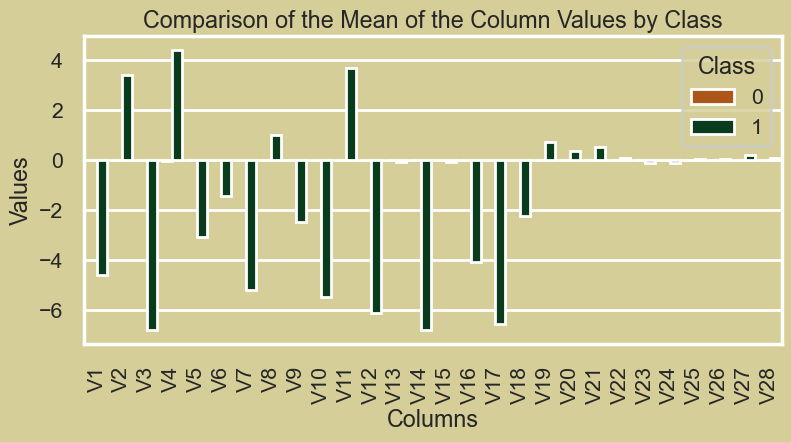

In [214]:
plt.figure(figsize=(9,4))
sns.barplot(x='Column', y='value', hue='Class', data=melted, palette=['#C65200','#00441B'])
plt.title('Comparison of the Mean of the Column Values by Class')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

### INSIGHT

When the above visual is examined, it appears that there is a significant difference between the mean values of class 0 and class 1 for all features from V1 to V20. This difference becomes more reasonable at the features from V21 to V27.

### Distributions of All the Columns

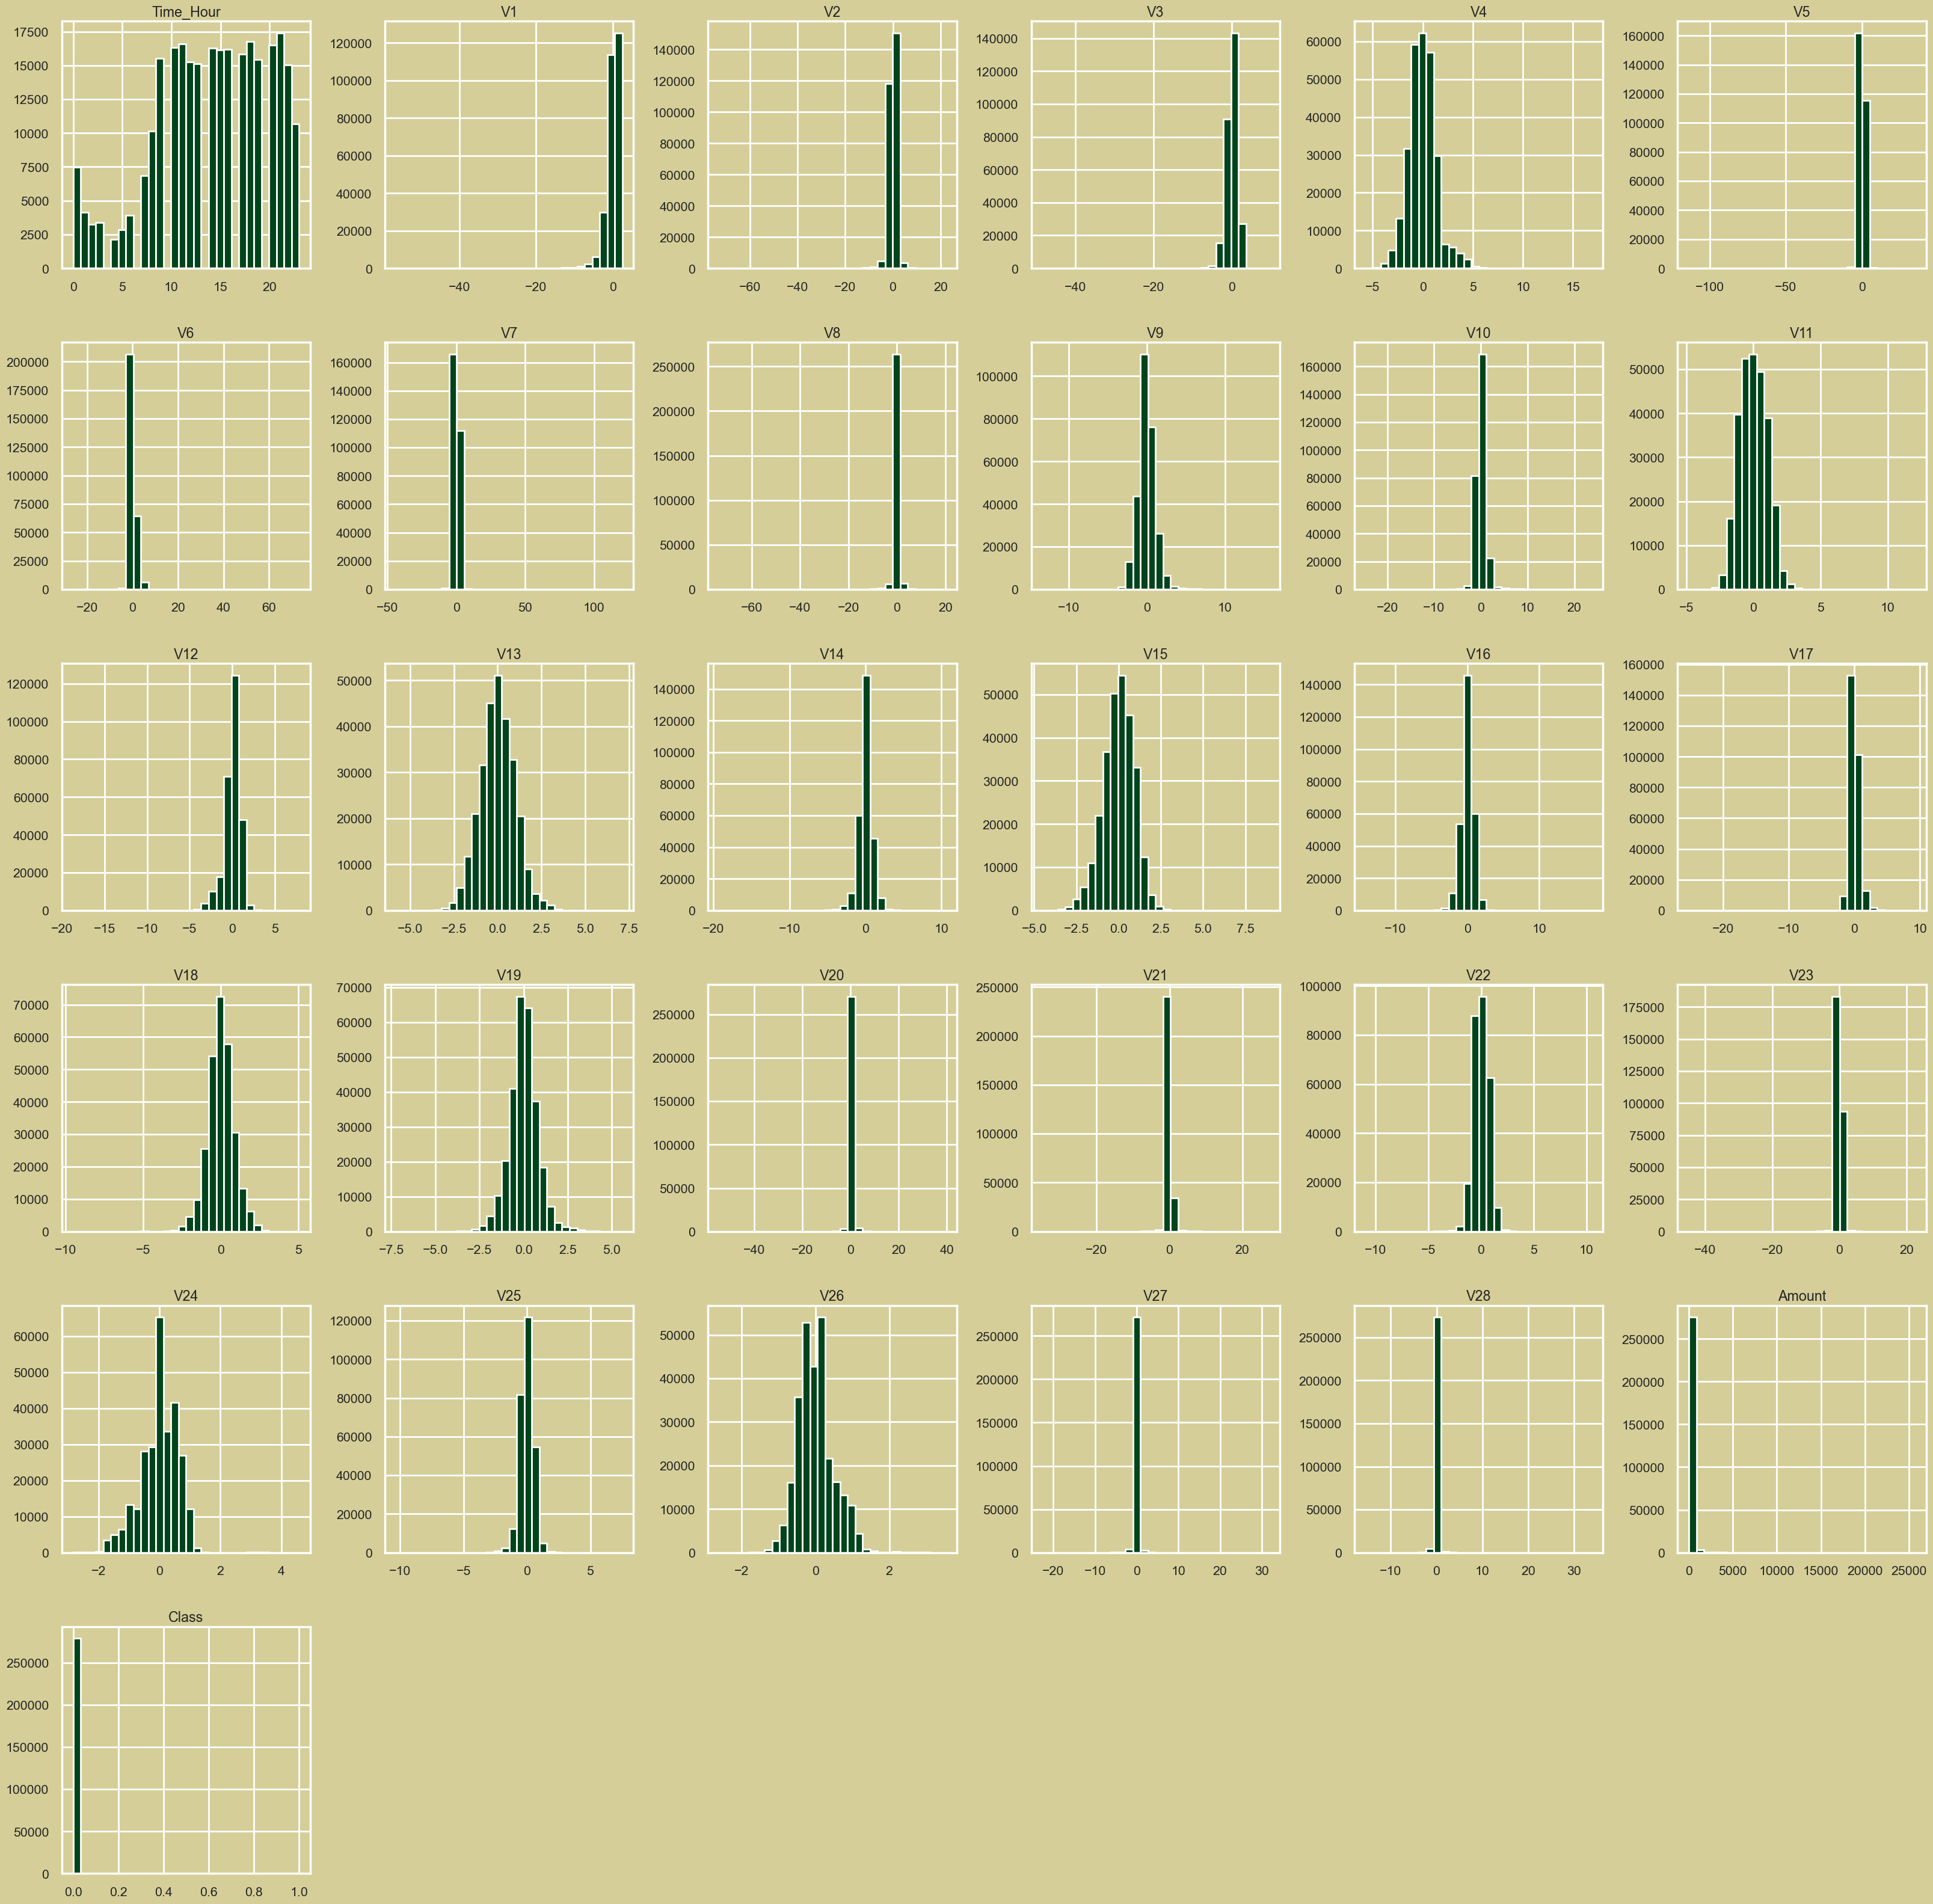

In [47]:
df.hist(bins=30, figsize=(40,40), color='#00441B');

### INSIGHT

When the histograms of all features except for Amount, Time_Hour, and Class are examined, it can be observed that they exhibit a normal distribution around 0.

### Histplot Comparison of Samples from Class 0 and Class 1 with Balanced Class Distribution

In [48]:
df_legit = df[df['Class']==0].sample(473)
df_legit

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164615,8,-0.621710,1.405840,-1.006554,0.701119,2.388417,1.300792,1.106908,0.271207,-0.921154,...,0.158588,0.829362,-0.216084,-0.751395,-0.145566,-0.335509,0.254227,0.262668,16.02,0
135131,22,1.248196,-0.844587,-0.042824,-0.424340,-0.995019,-0.638294,-0.386849,-0.036955,-0.443338,...,-0.414061,-0.799401,0.002096,0.057851,0.257341,1.123672,-0.079003,-0.000532,64.99,0
235233,17,2.008776,-0.005505,-3.302693,0.128400,3.072425,3.039084,0.204619,0.575494,-0.307186,...,0.134077,0.326133,0.003880,0.702029,0.500803,-0.466137,-0.017718,-0.065626,29.74,0
113235,20,-0.352150,-0.237284,2.131148,-1.614466,-1.387916,-0.469722,-0.111705,-0.170885,-2.789097,...,-0.259950,-0.473503,0.054721,0.365991,0.031906,-0.282443,0.086300,0.090506,76.65,0
184384,11,1.806364,-1.928179,-0.646383,-0.859487,-1.377988,0.305528,-1.367623,0.251552,0.826553,...,0.267747,0.244447,0.092361,-0.030513,-0.515809,-0.255748,-0.018660,-0.007496,204.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11653,5,1.383221,-0.374323,0.801387,-0.179139,-1.143624,-0.955257,-0.606965,-0.299969,0.740698,...,-0.147278,-0.048278,0.016941,0.691634,0.510037,-0.304183,-0.008015,0.010378,5.00,0
242153,18,1.974655,0.021240,-2.737542,-0.242355,1.860081,0.607452,0.727893,-0.068707,-0.065406,...,0.400928,1.534285,-0.073424,-0.558044,0.509055,0.556153,-0.030210,-0.096200,9.21,0
269199,21,-4.178686,-1.053584,0.034658,4.648260,1.584798,2.389429,-1.003349,1.508865,-1.601025,...,-0.512487,0.316853,1.833629,-0.951746,-0.372300,0.282758,1.085612,-0.162384,91.34,0
249205,18,-1.040136,1.912313,0.212288,2.682125,-0.066515,1.316727,-0.768227,-1.664079,-1.066866,...,2.231529,-1.182497,0.868812,0.607537,-1.236850,-0.642282,-0.153466,-0.042052,44.82,0


In [49]:
df_fraud = df[df['Class']==1]
df_fraud

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
623,0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,1,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,1,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,2,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,2,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,22,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,23,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,23,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,23,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [50]:
cols = list(df.columns.values)

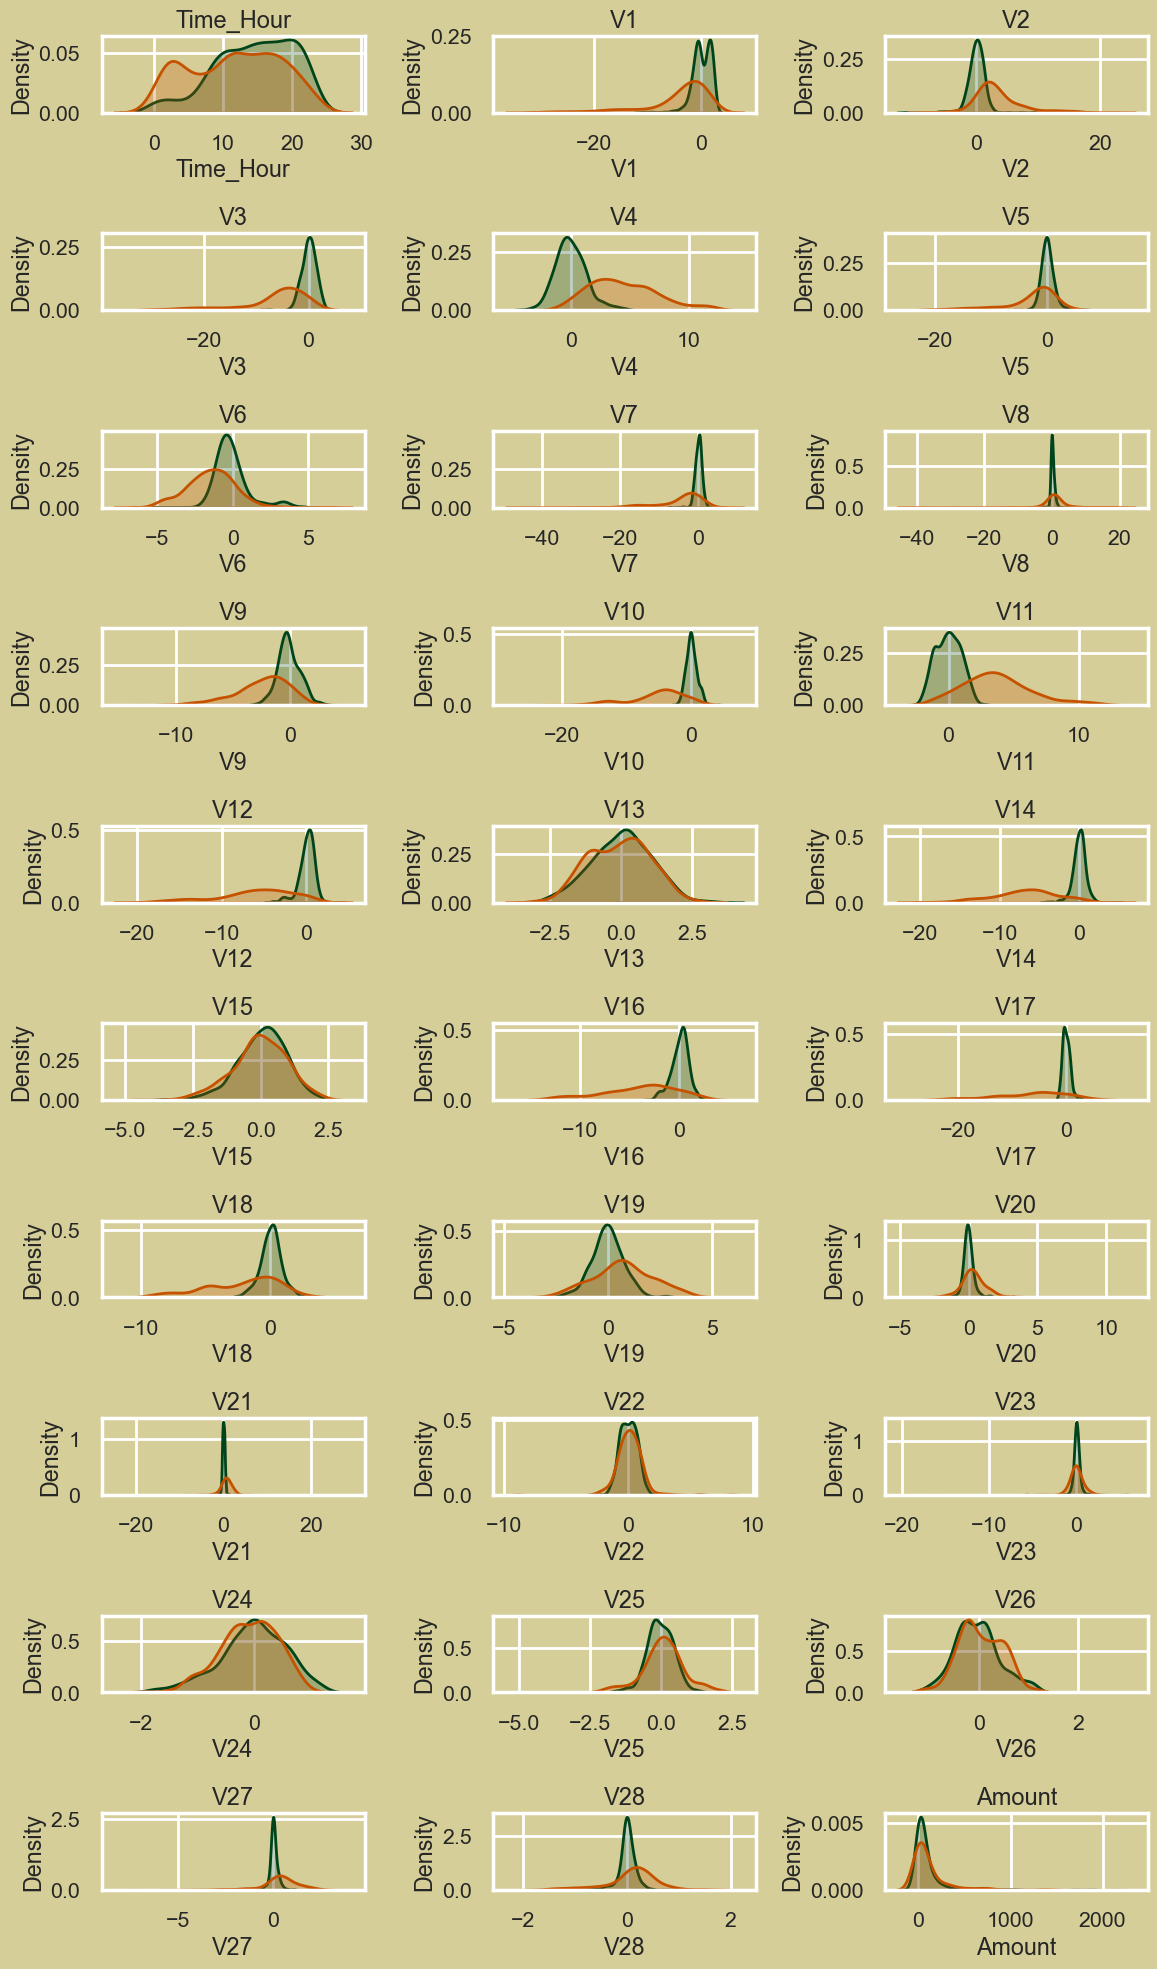

In [51]:
plt.figure(figsize=(12,20))
for n, col in enumerate(cols):
    if col not in ['Class']:
        plt.subplot(10,3,n+1)
        sns.kdeplot(df_legit[col], color='#00441B', fill=True)
        sns.kdeplot(df_fraud[col], color='#C65200', fill=True)
        plt.title(col, fontsize=17)
plt.tight_layout()
plt.show()

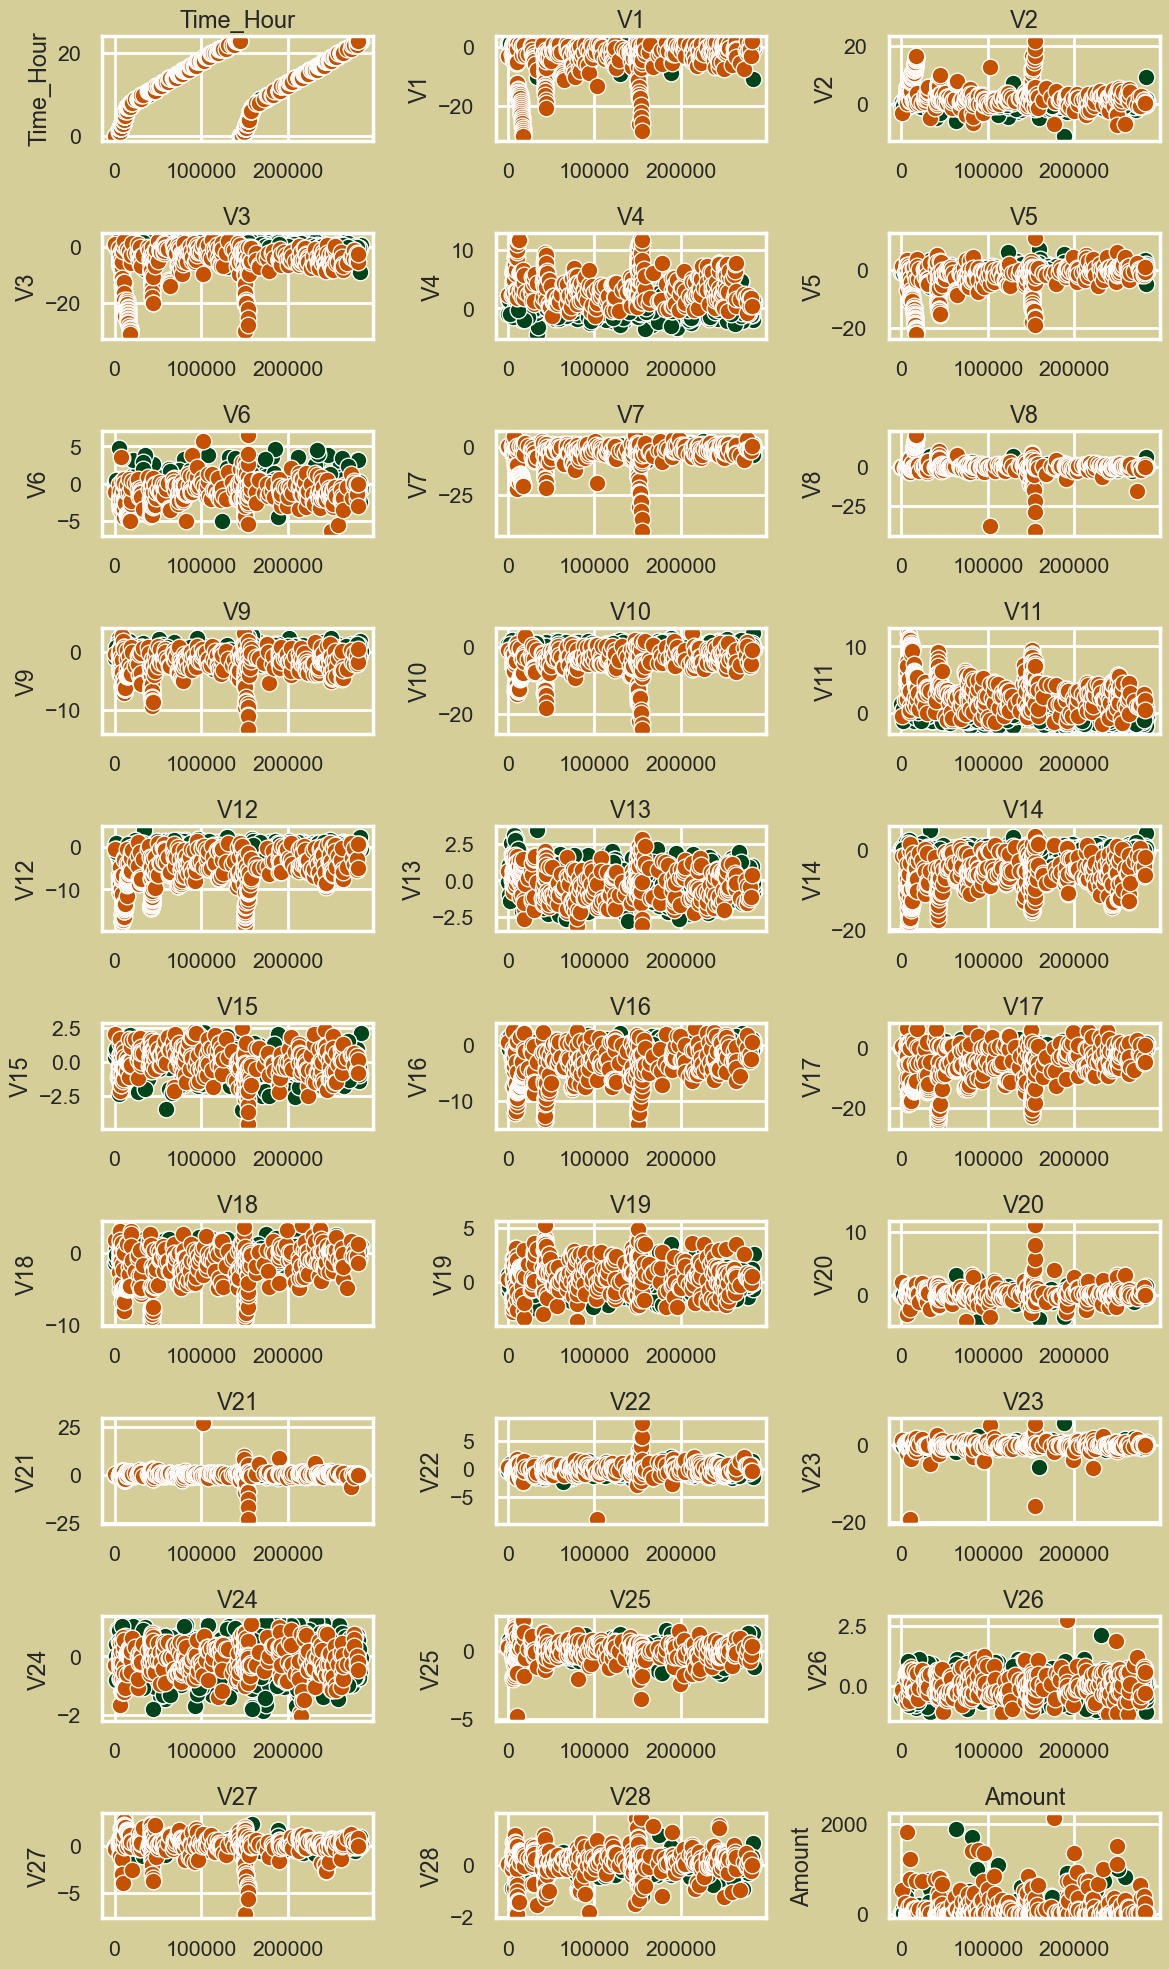

In [52]:

plt.figure(figsize=(12,20))
for n, col in enumerate(cols):
    if col not in ['Class']:
        plt.subplot(10,3,n+1)
        sns.scatterplot(df_legit[col], color='#00441B')
        sns.scatterplot(df_fraud[col], color='#C65200')
        plt.title(col, fontsize=17)
plt.tight_layout()
plt.show()

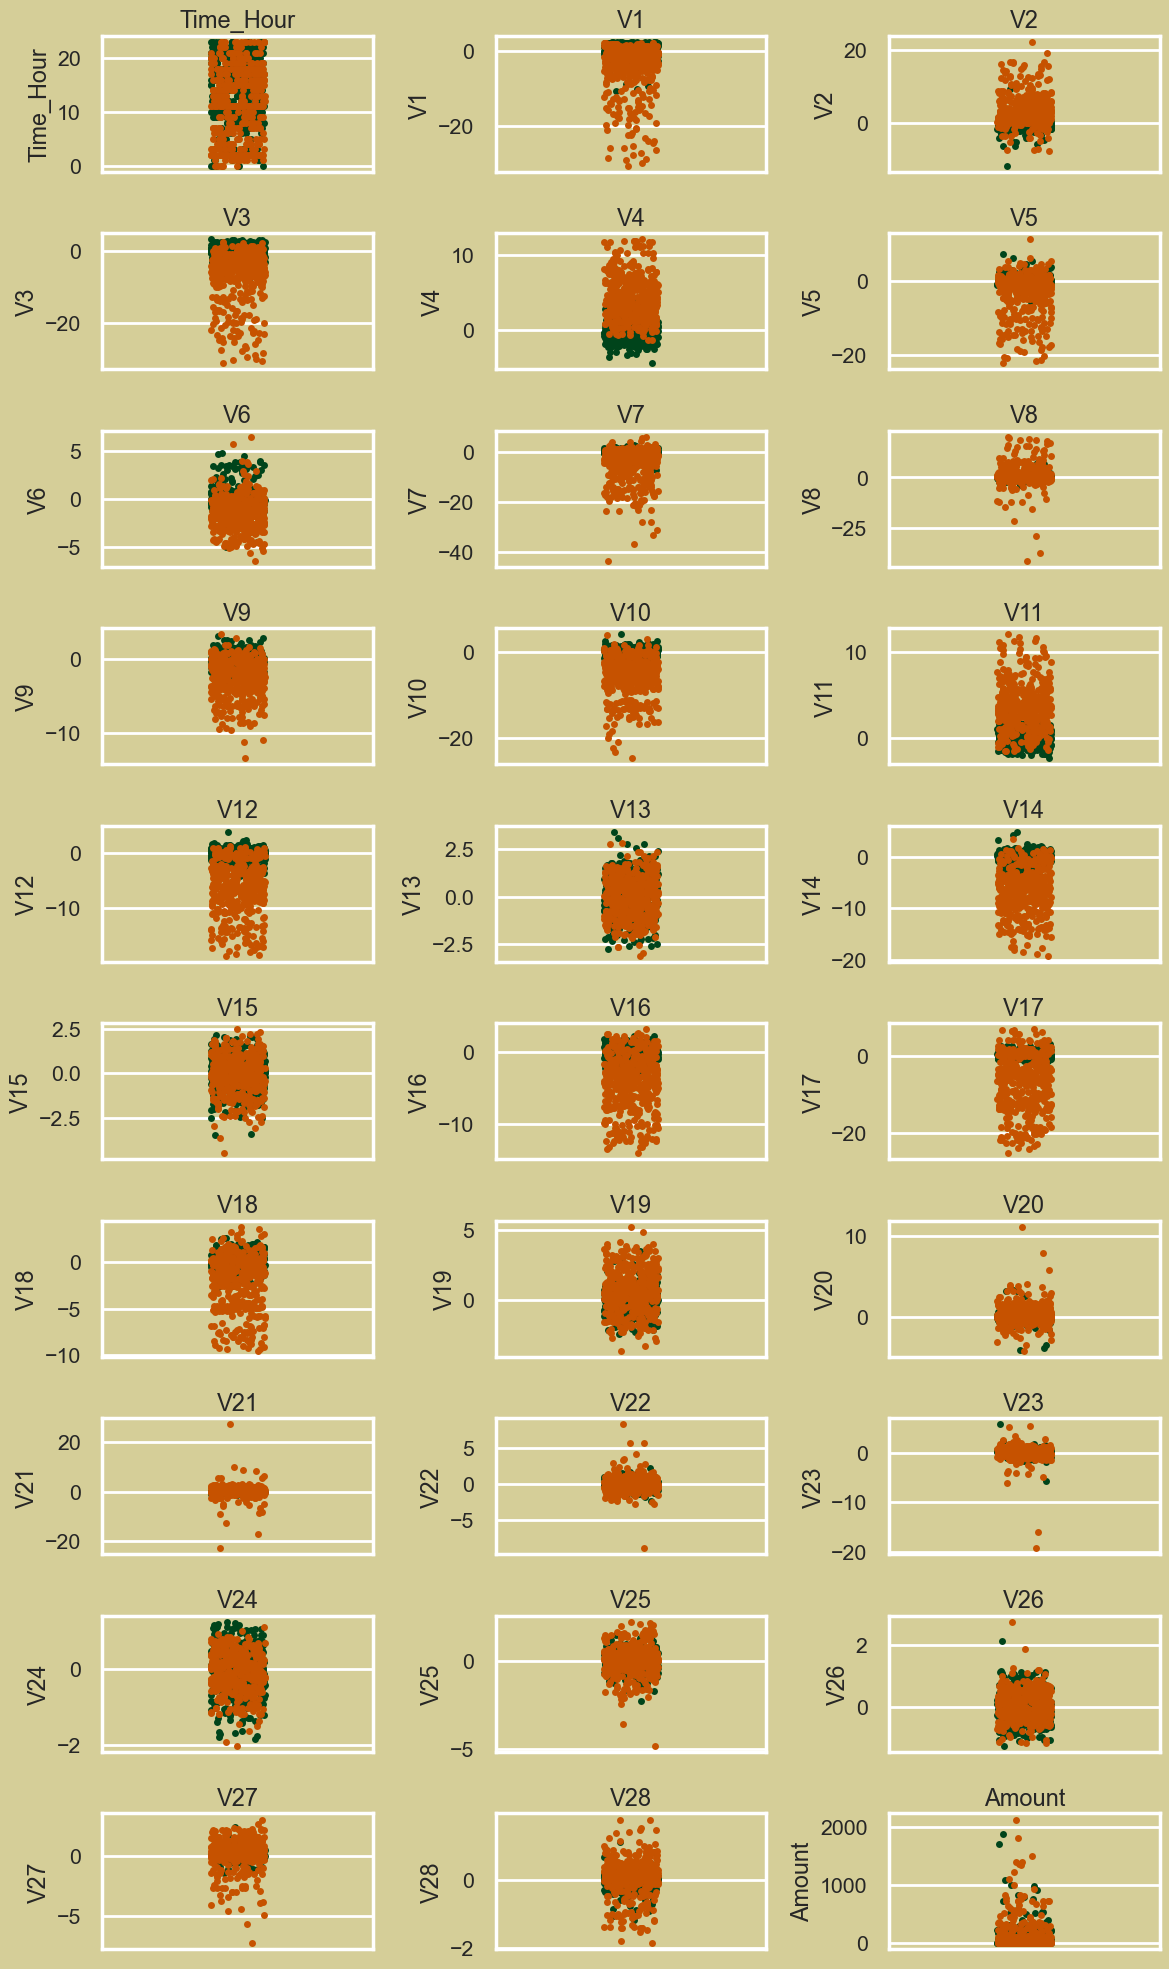

In [53]:
plt.figure(figsize=(12,20))
for n, col in enumerate(cols):
    if col not in ['Class']:
        plt.subplot(10,3,n+1)
        sns.stripplot(df_legit[col], color='#00441B')
        sns.stripplot(df_fraud[col], color='#C65200')
        plt.title(col, fontsize=17)
plt.tight_layout()
plt.show()

### INSIGHT

When the three plots above are examined, it can be observed that they yield similar results. Particularly, it can be said that the features V4, V11, V14, and V12 have better separation for Class 0 and Class 1 values compared to other features. We will take this into account in future feature selections and make new evaluations accordingly.

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [54]:
from deepchecks.tabular.suites import data_integrity
integ_suite = data_integrity()
suite_result = integ_suite.run(df)
suite_result.show()

deepchecks - WARNING - You are using deepchecks version 0.12.0, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 2 categorical features were inferred.: Time_Hour, Class


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_MN24L9P274N3ALM29Q7YMIJ46">Data Integrity Sui…

In [55]:
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

# first let's see how the check runs:
IsSingleValue().run(df)

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 2 categorical features were inferred.: Time_Hour, Class


In [56]:
single_value_with_condition = IsSingleValue().add_condition_not_single_value()
result = single_value_with_condition.run(df)
result.show()

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 2 categorical features were inferred.: Time_Hour, Class


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [57]:
X=df.drop('Class', axis=1)
y=df['Class']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [60]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

0    222942
1       358
Name: Class, dtype: int64

0    55736
1       90
Name: Class, dtype: int64


## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [61]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(X_train, X_test)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Time_Hour
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, there

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_AP4VJWV0NEZEBFUJGZ362H1HA">Train Test Validat…

## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Model Training***

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model=LogisticRegression(class_weight={0:0.95, 1:23}, solver='liblinear', multi_class='ovr',penalty='l1')

# We tried many values for the class_weight parameter in this ML model, and we achieved the best results with this value.

In [64]:
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.95, 1: 23}, multi_class='ovr',
                   penalty='l1', solver='liblinear')

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

precision_log_class_weight = precision_score(y_test, y_pred, pos_label=1)
recall_log_class_weight = recall_score(y_test, y_pred, pos_label=1)
f1_log_class_weight = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_log_class_weight,2))
print('Recall       :',round(recall_log_class_weight,2))
print('f1-score     :',round(f1_log_class_weight,2))

Precision    : 0.63
Recall       : 0.79
f1-score     : 0.7


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [67]:
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[55694    42]
 [   19    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.63      0.79      0.70        90

    accuracy                           1.00     55826
   macro avg       0.81      0.89      0.85     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222801    141]
 [    56    302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222942
           1       0.68      0.84      0.75       358

    accuracy                           1.00    223300
   macro avg       0.84      0.92      0.88    223300
weighted avg       1.00      1.00      1.00    223300



In [68]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
model = LogisticRegression(class_weight={0:0.95, 1:23}, solver='liblinear', multi_class='ovr',penalty='l1')
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.999086
train_accuracy     0.999096
test_precision     0.677859
train_precision    0.674014
test_recall        0.843254
train_recall       0.845433
test_f1            0.749670
train_f1           0.750033
dtype: float64

***iv. Plot Precision and Recall Curve***


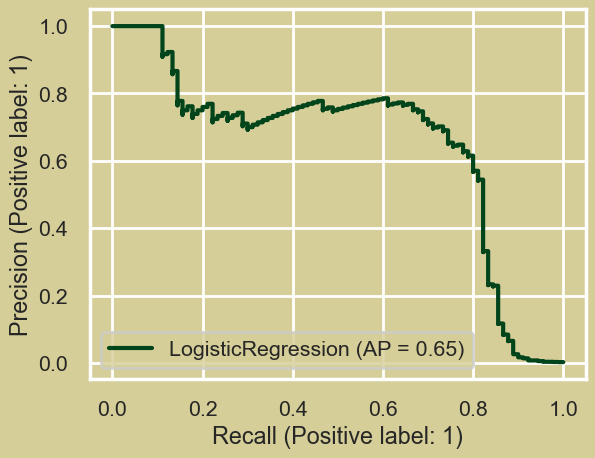

In [69]:
model.fit(X_train, y_train)
plot_precision_recall_curve(model, X_test, y_test, color="#00441B");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [70]:
from deepchecks.tabular.suites import model_evaluation

X_train_df= pd.DataFrame(X_train)
X_test_df= pd.DataFrame(X_test)

gbr = LogisticRegression(class_weight={0:0.95, 1:23}, solver='liblinear', multi_class='ovr',penalty='l1')
gbr.fit(X_train, y_train)
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(X_train_df, X_test_df, gbr)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuris

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FI8RIA3P2WJVLCM7V8BS22XPS">Model Evaluation S…

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

##### 1) SMOTE WITHOUT PIPELINE

***i. Train-Test Split***

In [71]:
from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy={0:1, 1:0.75})
smote = SMOTE(sampling_strategy=0.04)

In [72]:
X=df.drop('Class', axis=1)
y=df['Class']

In [73]:
y.value_counts()

0    278678
1       448
Name: Class, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [75]:
X_train, y_train = smote.fit_resample(X_train,y_train)

In [76]:
y_train.value_counts()

0    222942
1      8917
Name: Class, dtype: int64

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
log_smote = LogisticRegression()

***ii. Model Training***

In [79]:
log_smote.fit(X_train, y_train)

LogisticRegression()

***iii.Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [80]:
y_pred = log_smote.predict(X_test)

precision_logistic_smote = precision_score(y_test, y_pred, pos_label=1)
recall_logistic_smote = recall_score(y_test, y_pred, pos_label=1)
f1_logistic_smote = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_logistic_smote,2))
print('Recall       :',round(recall_logistic_smote,2))
print('f1-score     :',round(f1_logistic_smote,2))

Precision    : 0.63
Recall       : 0.8
f1-score     : 0.7


In [81]:
eval_metric(log_smote, X_train, y_train, X_test, y_test)

Test_Set
[[55693    43]
 [   18    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.63      0.80      0.70        90

    accuracy                           1.00     55826
   macro avg       0.81      0.90      0.85     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222799    143]
 [  1146   7771]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    222942
           1       0.98      0.87      0.92      8917

    accuracy                           0.99    231859
   macro avg       0.99      0.94      0.96    231859
weighted avg       0.99      0.99      0.99    231859



In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True)
model = LogisticRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.994419
train_accuracy     0.994448
test_precision     0.981314
train_precision    0.981826
test_recall        0.871482
train_recall       0.871768
test_f1            0.923136
train_f1           0.923529
dtype: float64

***iv.  Plot Precision and Recall Curve***


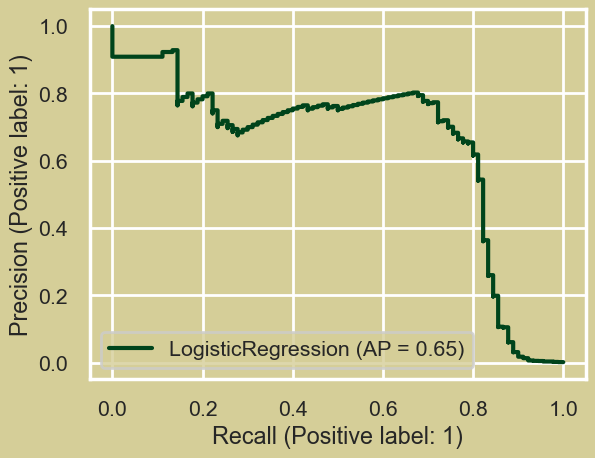

In [83]:
# log_smote.fit(X_train, y_train)
plot_precision_recall_curve(log_smote, X_test, y_test, color="#00441B");

***v.  Model Evaluation***

We applied SMOTE to X_train in this stage of the Logistic Regression model, adjusting the number of minority class samples to be equal to 4% of the majority class. However, there was a significant difference between the scores on the train set and the test set, and it was determined that the model was overfitting. In the applied cross-validation, both the train and test results were high and very close to each other. This was interpreted as the scores increasing because the cross-validation was performed on the train set, which had also been increased by applying SMOTE to the 1 class. As a result, this model will not be preferred since it did not provide reliable results.

##### 2) SMOTE WITH PIPELINE

***i. Train-Test Split***

***ii. Model Training***

In [84]:
X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


log_pipe_smote = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.04)), ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())])


log_pipe_smote.fit(X_train, y_train)



Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.04)),
                ('scaler', StandardScaler()),
                ('logreg', LogisticRegression())])

***iii.Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [85]:
y_pred = log_pipe_smote.predict(X_test)

precision_logistic_pipe_smote = precision_score(y_test, y_pred, pos_label=1)
recall_logistic_pipe_smote = recall_score(y_test, y_pred, pos_label=1)
f1_logistic_pipe_smote = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_logistic_pipe_smote,2))
print('Recall       :',round(recall_logistic_pipe_smote,2))
print('f1-score     :',round(f1_logistic_pipe_smote,2))

Precision    : 0.63
Recall       : 0.79
f1-score     : 0.7


In [86]:
eval_metric(log_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[55695    41]
 [   19    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.63      0.79      0.70        90

    accuracy                           1.00     55826
   macro avg       0.82      0.89      0.85     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222804    138]
 [    54    304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222942
           1       0.69      0.85      0.76       358

    accuracy                           1.00    223300
   macro avg       0.84      0.92      0.88    223300
weighted avg       1.00      1.00      1.00    223300



In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True)
model = log_pipe_smote
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.999118
train_accuracy     0.999134
test_precision     0.685149
train_precision    0.685720
test_recall        0.843254
train_recall       0.849468
test_f1            0.755095
train_f1           0.758828
dtype: float64

***iv.  Plot Precision and Recall Curve***

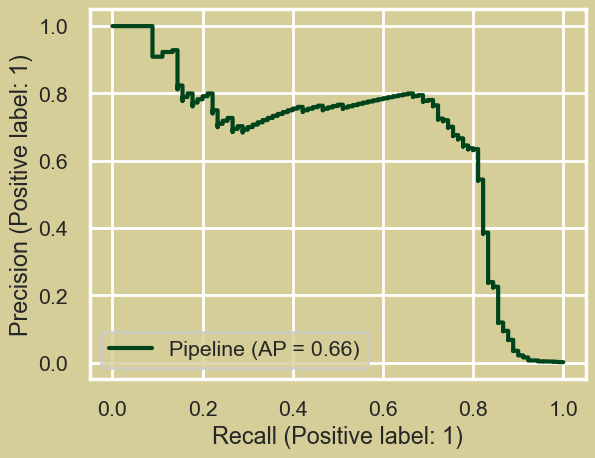

In [88]:
plot_precision_recall_curve(log_pipe_smote, X_test, y_test, color="#00441B");

***v.  Model Evaluation***

In this model, SMOTE was applied using a pipeline. When looking at the scores, it was observed that the train and test scores were close to each other and the cross-validation scores were also consistent with the hold-out scores. Therefore, it can be said that our model is not overfitting.

##### 3) GRIDSEARCHCV WITH LOGISTIC REGRESSİON

In [89]:
X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


operations =[('smote', SMOTE(sampling_strategy=0.04)), ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.05, 0.1]
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear","sag","saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}
cv = StratifiedKFold(n_splits =5)
grid_log_pipe_smote = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",   
                          n_jobs = -1,
                          return_train_score=True)

In [90]:
grid_log_pipe_smote.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.04)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.05, 0.1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='f1')

In [91]:
grid_log_pipe_smote.best_params_

{'logistic__C': 0.01,
 'logistic__class_weight': None,
 'logistic__penalty': 'l2',
 'logistic__solver': 'saga'}

In [92]:
y_pred = grid_log_pipe_smote.predict(X_test)

precision_grid_log_pipe_smote = precision_score(y_test, y_pred, pos_label=1)
recall_grid_log_pipe_smote = recall_score(y_test, y_pred, pos_label=1)
f1_grid_log_pipe_smote = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_grid_log_pipe_smote,2))
print('Recall       :',round(recall_grid_log_pipe_smote,2))
print('f1-score     :',round(f1_grid_log_pipe_smote,2))

Precision    : 0.64
Recall       : 0.78
f1-score     : 0.7


In [93]:
eval_metric(grid_log_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[55696    40]
 [   20    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.64      0.78      0.70        90

    accuracy                           1.00     55826
   macro avg       0.82      0.89      0.85     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222813    129]
 [    56    302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222942
           1       0.70      0.84      0.77       358

    accuracy                           1.00    223300
   macro avg       0.85      0.92      0.88    223300
weighted avg       1.00      1.00      1.00    223300



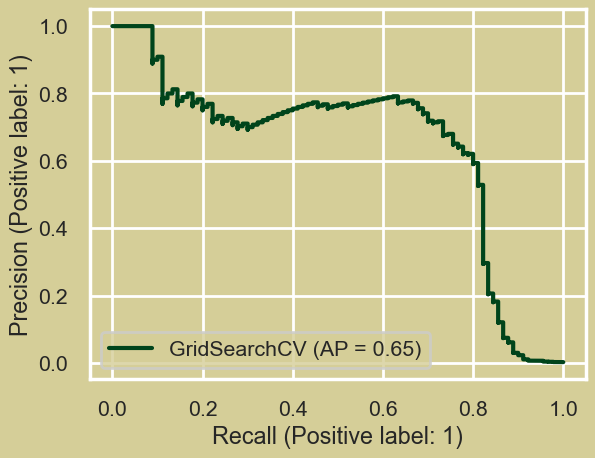

In [94]:
plot_precision_recall_curve(grid_log_pipe_smote, X_test, y_test, color="#00441B");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [95]:
from deepchecks.tabular.suites import model_evaluation

X_train_df= pd.DataFrame(X_train)
X_test_df= pd.DataFrame(X_test)

gbr = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.045)), ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())])
gbr.fit(X_train, y_train)
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(X_train_df, X_test_df, gbr)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Time_Hour
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, there

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Expected dataset with label.


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_74ZIGA9ZI1O4DMD8ZOWLE3D8S">Model Evaluation S…

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [96]:
X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


rf_pipe_smote = Pipeline([('smote', SMOTE(sampling_strategy=0.035)),('RF', RandomForestClassifier(max_depth=4))])


rf_pipe_smote.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.035)),
                ('RF', RandomForestClassifier(max_depth=4))])

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [97]:
y_pred = rf_pipe_smote.predict(X_test)

precision_rf_pipe_smote = precision_score(y_test, y_pred, pos_label=1)
recall_rf_pipe_smote = recall_score(y_test, y_pred, pos_label=1)
f1_rf_pipe_smote = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_rf_pipe_smote,2))
print('Recall       :',round(recall_rf_pipe_smote,2))
print('f1-score     :',round(f1_rf_pipe_smote,2))

Precision    : 0.72
Recall       : 0.77
f1-score     : 0.74


In [98]:
eval_metric(rf_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[55709    27]
 [   21    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.72      0.77      0.74        90

    accuracy                           1.00     55826
   macro avg       0.86      0.88      0.87     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222867     75]
 [    57    301]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222942
           1       0.80      0.84      0.82       358

    accuracy                           1.00    223300
   macro avg       0.90      0.92      0.91    223300
weighted avg       1.00      1.00      1.00    223300



In [99]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
model = rf_pipe_smote
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.999386
train_accuracy     0.999453
test_precision     0.806014
train_precision    0.825913
test_recall        0.815397
train_recall       0.835189
test_f1            0.809621
train_f1           0.830373
dtype: float64

In [100]:
operations = [('smote', SMOTE(sampling_strategy=0.04)),("randomforest", RandomForestClassifier())]

model = Pipeline(steps=operations)

n_estimators = [100, 200]
max_depth = [2,3]
min_samples_split = [3,4]
min_samples_leaf = [2,3]
param_grid = {"randomforest__n_estimators" : n_estimators,
              "randomforest__max_depth" : max_depth,
              "randomforest__min_samples_split":min_samples_split,
              "randomforest__min_samples_leaf":min_samples_leaf}
cv = StratifiedKFold(n_splits =5)
rf_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",   
                          n_jobs = -1,
                          return_train_score=True)

In [101]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.04)),
                                       ('randomforest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforest__max_depth': [2, 3],
                         'randomforest__min_samples_leaf': [2, 3],
                         'randomforest__min_samples_split': [3, 4],
                         'randomforest__n_estimators': [100, 200]},
             return_train_score=True, scoring='f1')

In [102]:
rf_grid.best_params_

{'randomforest__max_depth': 2,
 'randomforest__min_samples_leaf': 2,
 'randomforest__min_samples_split': 4,
 'randomforest__n_estimators': 200}

In [103]:
y_pred = rf_grid.predict(X_test)

precision_rf_grid = precision_score(y_test, y_pred, pos_label=1)
recall_rf_grid = recall_score(y_test, y_pred, pos_label=1)
f1_rf_grid = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_rf_grid,2))
print('Recall       :',round(recall_rf_grid,2))
print('f1-score     :',round(f1_rf_grid,2))

Precision    : 0.8
Recall       : 0.71
f1-score     : 0.75


In [104]:
eval_metric(rf_grid, X_train, y_train, X_test, y_test)

Test_Set
[[55720    16]
 [   26    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.80      0.71      0.75        90

    accuracy                           1.00     55826
   macro avg       0.90      0.86      0.88     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222901     41]
 [    78    280]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222942
           1       0.87      0.78      0.82       358

    accuracy                           1.00    223300
   macro avg       0.94      0.89      0.91    223300
weighted avg       1.00      1.00      1.00    223300



***iii. Plot Precision and Recall Curve***


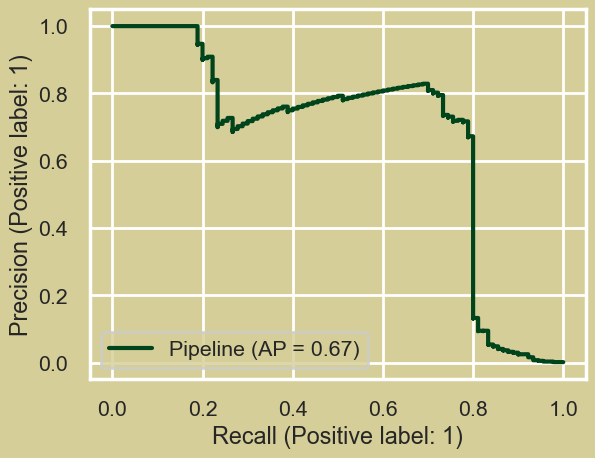

In [105]:
plot_precision_recall_curve(rf_pipe_smote, X_test, y_test, color="#00441B");

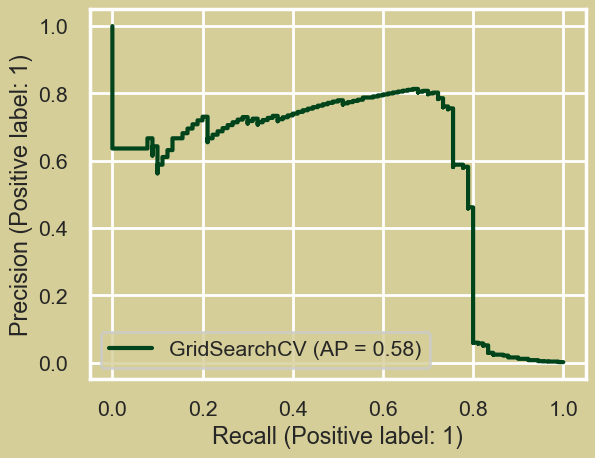

In [106]:
plot_precision_recall_curve(rf_grid, X_test, y_test, color="#00441B");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [107]:
from deepchecks.tabular.suites import model_evaluation

X_train_df= pd.DataFrame(X_train)
X_test_df= pd.DataFrame(X_test)

gbr = Pipeline([('smote', SMOTE(sampling_strategy=0.035)),('RF', RandomForestClassifier(max_depth=4))])
gbr.fit(X_train, y_train)
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(X_train_df, X_test_df, gbr)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Time_Hour
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, there

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Expected dataset with label.


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_X432Z297NPCW1CJHO57JN5975">Model Evaluation S…

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [108]:
X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


xgb_pipe_smote = Pipeline([('smote', SMOTE(sampling_strategy=0.035)),('XGBoost', XGBClassifier(max_depth=1))])


xgb_pipe_smote.fit(X_train, y_train)

[10:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.035)),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=1, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [109]:
y_pred = xgb_pipe_smote.predict(X_test)

precision_xgb_pipe_smote = precision_score(y_test, y_pred, pos_label=1)
recall_xgb_pipe_smote = recall_score(y_test, y_pred, pos_label=1)
f1_xgb_pipe_smote = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_xgb_pipe_smote,2))
print('Recall       :',round(recall_xgb_pipe_smote,2))
print('f1-score     :',round(f1_xgb_pipe_smote,2))

Precision    : 0.65
Recall       : 0.8
f1-score     : 0.72


In [110]:
eval_metric(xgb_pipe_smote, X_train, y_train, X_test, y_test)

Test_Set
[[55698    38]
 [   18    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.65      0.80      0.72        90

    accuracy                           1.00     55826
   macro avg       0.83      0.90      0.86     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222814    128]
 [    52    306]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222942
           1       0.71      0.85      0.77       358

    accuracy                           1.00    223300
   macro avg       0.85      0.93      0.89    223300
weighted avg       1.00      1.00      1.00    223300



In [111]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
model = xgb_pipe_smote
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

test_accuracy      0.999122
train_accuracy     0.999194
test_precision     0.682137
train_precision    0.704263
test_recall        0.846205
train_recall       0.857538
test_f1            0.755147
train_f1           0.773342
dtype: float64

In [112]:
param_grid = {"XGBoost__n_estimators":[50, 100], "XGBoost__learning_rate": [0.1, 0.2],
             "XGBoost__subsample":[0.5, 1]}
model = Pipeline([('smote', SMOTE(sampling_strategy=0.035)),('XGBoost', XGBClassifier(max_depth=1))])
xgb_grid = GridSearchCV(model, param_grid, scoring = "recall", verbose=2, n_jobs = -1, 
                        return_train_score=True)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[11:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('smote',
                                        SMOTE(sampling_strategy=0.035)),
                                       ('XGBoost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=1,

In [113]:
xgb_grid.best_params_

{'XGBoost__learning_rate': 0.2,
 'XGBoost__n_estimators': 100,
 'XGBoost__subsample': 1}

In [114]:
y_pred = xgb_grid.predict(X_test)

precision_xgb_grid = precision_score(y_test, y_pred, pos_label=1)
recall_xgb_grid = recall_score(y_test, y_pred, pos_label=1)
f1_xgb_grid = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_xgb_grid,2))
print('Recall       :',round(recall_xgb_grid,2))
print('f1-score     :',round(f1_xgb_grid,2))

Precision    : 0.62
Recall       : 0.79
f1-score     : 0.7


In [115]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[55693    43]
 [   19    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55736
           1       0.62      0.79      0.70        90

    accuracy                           1.00     55826
   macro avg       0.81      0.89      0.85     55826
weighted avg       1.00      1.00      1.00     55826


Train_Set
[[222780    162]
 [    53    305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222942
           1       0.65      0.85      0.74       358

    accuracy                           1.00    223300
   macro avg       0.83      0.93      0.87    223300
weighted avg       1.00      1.00      1.00    223300



***iii. Plot Precision and Recall Curve***


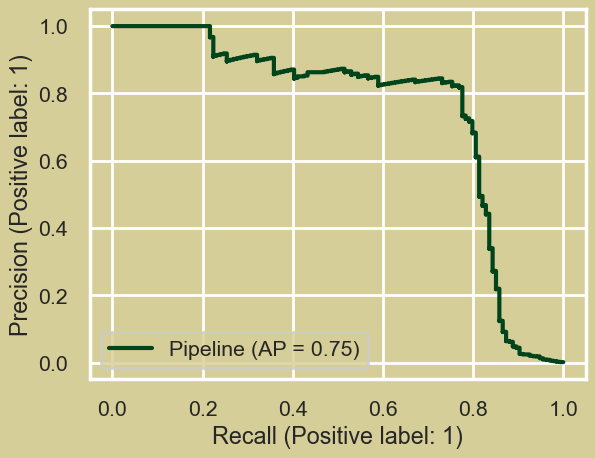

In [152]:
plot_precision_recall_curve(xgb_pipe_smote, X_test, y_test, color="#00441B");

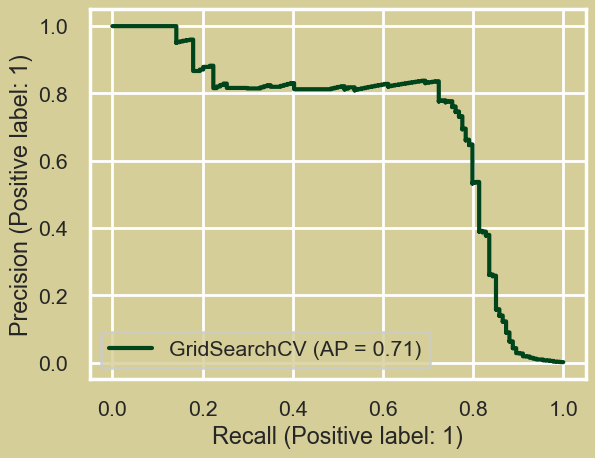

In [153]:
plot_precision_recall_curve(xgb_grid, X_test, y_test,color="#00441B");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

***ii. Define and Compile Model***

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy=0.03)

X=df.drop('Class', axis=1)
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)
# X_train, y_train = smote.fit_resample(X_train,y_train)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [120]:
# model = Sequential()

# model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
# model.add(Dropout(0.8))
# model.add(Dense(10, activation = "relu"))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation = "sigmoid"))

# opt = Adam(learning_rate=0.002)
# model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [121]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                   classes=np.unique(y_train),
#                                                   y=y_train)

# class_weights = {0: class_weights[0], 1: class_weights[1]}
# class_weights

In [122]:
# early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10, restore_best_weights = True)

***iii. Fit Model***

In [123]:
# model.fit(x=X_train,
#           y=y_train,
#           validation_split=.1,
#           batch_size=150,
#           epochs=150,
#           verbose=1,
#           class_weight=class_weights,
#          callbacks = [early_stop])

In [146]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = Sequential()

    model.add(Dense(55, activation = "relu", input_dim = X_train.shape[1]))
    model.add(Dropout(0.6))
    model.add(Dense(28, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(12, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation = "relu"))
#     model.add(Dropout(0.1))
    model.add(Dense(1, activation = "sigmoid"))

    opt = Adam(learning_rate=0.002)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])
    return model

In [147]:
pipeline = Pipeline([('smote', SMOTE(sampling_strategy=0.02)),
    ('scaler', StandardScaler()),
    ('model', KerasClassifier(build_fn=create_model))])

In [148]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10, restore_best_weights = True)

In [149]:
model = Pipeline([('smote', SMOTE(sampling_strategy=0.035)),
                     ('scaler', StandardScaler()),
                     ('model', KerasClassifier(build_fn=create_model, epochs=150, batch_size=150, verbose=1, callbacks = [early_stop]))])

model.fit(X_train, y_train, model__validation_split=0.1)

Epoch 1/150
1212/1212 [==============================] - 9s 5ms/step - loss: 0.0132 - recall: 0.0000e+00 - val_loss: 0.5526 - val_recall: 0.0000e+00
Epoch 2/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0051 - recall: 0.0000e+00 - val_loss: 0.4366 - val_recall: 0.0000e+00
Epoch 3/150
1212/1212 [==============================] - 6s 5ms/step - loss: 0.0044 - recall: 0.4551 - val_loss: 0.3548 - val_recall: 0.8376
Epoch 4/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0041 - recall: 0.6910 - val_loss: 0.3778 - val_recall: 0.8226
Epoch 5/150
1212/1212 [==============================] - 4s 4ms/step - loss: 0.0040 - recall: 0.6877 - val_loss: 0.3838 - val_recall: 0.8317
Epoch 6/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0037 - recall: 0.7209 - val_loss: 0.3279 - val_recall: 0.8262
Epoch 7/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0038 - recall: 0.7276 - val_loss: 0.2763 - val_recall: 0.83

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.035)),
                ('scaler', StandardScaler()),
                ('model',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000015C15A8EE50>)])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

***v. Prediction and Model Evaluating***

In [150]:
y_pred = model.predict(X_test)

precision_dl = precision_score(y_test, y_pred, pos_label=1)
recall_dl = recall_score(y_test, y_pred, pos_label=1)
f1_dl = f1_score(y_test, y_pred, pos_label=1)

print('Precision    :',round(precision_dl,2))
print('Recall       :',round(recall_dl,2))
print('f1-score     :',round(f1_dl,2))

2617/2617 [==============================] - 5s 2ms/step
Precision    : 0.82
Recall       : 0.72
f1-score     : 0.77


In [151]:
y_train_pred = model.predict(X_train)>0.5
y_pred = model.predict(X_test)>0.5
    
print("Test_Set")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print()
print("Train_Set")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

2617/2617 [==============================] - 11s 4ms/step
Test_Set
[[83582    22]
 [   37    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83604
           1       0.82      0.72      0.77       134

    accuracy                           1.00     83738
   macro avg       0.91      0.86      0.88     83738
weighted avg       1.00      1.00      1.00     83738


Train_Set
[[195028     46]
 [    53    261]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    195074
           1       0.85      0.83      0.84       314

    accuracy                           1.00    195388
   macro avg       0.92      0.92      0.92    195388
weighted avg       1.00      1.00      1.00    195388



***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [155]:
from deepchecks.tabular.suites import model_evaluation

X_train_df= pd.DataFrame(X_train)
X_test_df= pd.DataFrame(X_test)

gbr = Pipeline([('smote', SMOTE(sampling_strategy=0.035)),
                     ('scaler', StandardScaler()),
                     ('model', KerasClassifier(build_fn=create_model, epochs=150, batch_size=150, verbose=1, callbacks = [early_stop]))])

gbr.fit(X_train, y_train, model__validation_split=0.1)
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(X_train_df, X_test_df, gbr)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Epoch 1/150
1212/1212 [==============================] - 8s 4ms/step - loss: 0.0203 - recall: 0.0066 - val_loss: 0.5233 - val_recall: 0.0011
Epoch 2/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0054 - recall: 0.2093 - val_loss: 0.4656 - val_recall: 0.7904
Epoch 3/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0048 - recall: 0.5216 - val_loss: 0.3748 - val_recall: 0.8043
Epoch 4/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0040 - recall: 0.5914 - val_loss: 0.4459 - val_recall: 0.8170
Epoch 5/150
1212/1212 [==============================] - 5s 4ms/step - loss: 0.0038 - recall: 0.6611 - val_loss: 0.3694 - val_recall: 0.8212
Epoch 6/150
1212/1212 [==============================] - 7s 6ms/step - loss: 0.0037 - recall: 0.7375 - val_loss: 0.2982 - val_recall: 0.8149
Epoch 7/150
1212/1212 [==============================] - 7s 5ms/step - loss: 0.0037 - recall: 0.7741 - val_loss: 0.3599 - val_recall: 0.8219
Epoch 8/150
1

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Time_Hour
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, there

1/1 [==============================] - 0s 27ms/step


deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Expected dataset with label.


32/32 [==============================] - 0s 2ms/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_BTPVMGNIKT04CI96S994SRPTT">Model Evaluation S…

### Compare Models

In [156]:
compare = pd.DataFrame({"Model": ["LogisticRegression_ClassWeight","LogisticRegression","LogisticRegression_Grid", "RandomForest","RandomForest_Grid","XGBoost","XGBoost_Grid",],
                        "recall": [recall_log_class_weight,recall_logistic_pipe_smote,recall_grid_log_pipe_smote,recall_rf_pipe_smote,recall_rf_grid,recall_xgb_pipe_smote,recall_xgb_grid],
                       "precision":[precision_log_class_weight,precision_logistic_pipe_smote,precision_grid_log_pipe_smote,precision_rf_pipe_smote,precision_rf_grid,precision_xgb_pipe_smote,precision_xgb_grid],
                       "f1-score":[f1_log_class_weight,f1_logistic_pipe_smote,f1_grid_log_pipe_smote,f1_rf_pipe_smote,f1_rf_grid,f1_xgb_pipe_smote,f1_xgb_grid]})
compare = compare.sort_values(by="recall", ascending=False)
compare

# Since overfitting hazard has been detected, Logistic Regression Without Pipeline Smote score is excluded from the list.

,Model,recall,precision,f1-score
5,XGBoost,0.800000,0.654545,0.720000
0,LogisticRegression_ClassWeight,0.788889,0.628319,0.699507
1,LogisticRegression,0.788889,0.633929,0.702970
6,XGBoost_Grid,0.788889,0.622807,0.696078
2,LogisticRegression_Grid,0.777778,0.636364,0.700000
3,RandomForest,0.766667,0.718750,0.741935
4,RandomForest_Grid,0.711111,0.800000,0.752941


### RECALL RANK

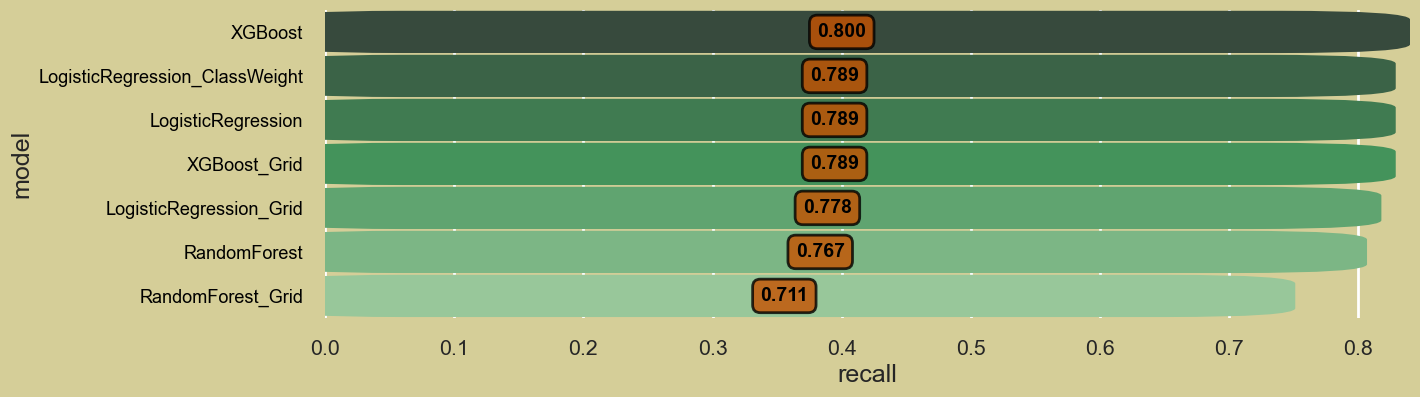

In [158]:
from matplotlib.patches import FancyBboxPatch

plt.figure(figsize=(14,4))
palette = sns.color_palette("Greens_d", len(compare))[::-1]
ax=sns.barplot(x="recall", y="Model", data=compare.sort_values(by="recall", ascending=False), palette=palette)
plt.xlabel('recall', fontsize=18)
plt.ylabel('model', fontsize=18)
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
ax.bar_label(ax.containers[0], fmt="%.3f", label_type='center', 
             fontweight='bold', fontsize=14, color='black', 
             bbox=dict(boxstyle='round',facecolor='#C65200', alpha=0.8, edgecolor='black', pad=0.4))
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.04,rounding_size=0.1",
                            ec="none", fc=color,
                            mutation_aspect=2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

sns.despine(left=True, bottom=True)
ax.tick_params(axis='y', labelsize=13, labelcolor='black')
plt.show();

### PRECISION RANK

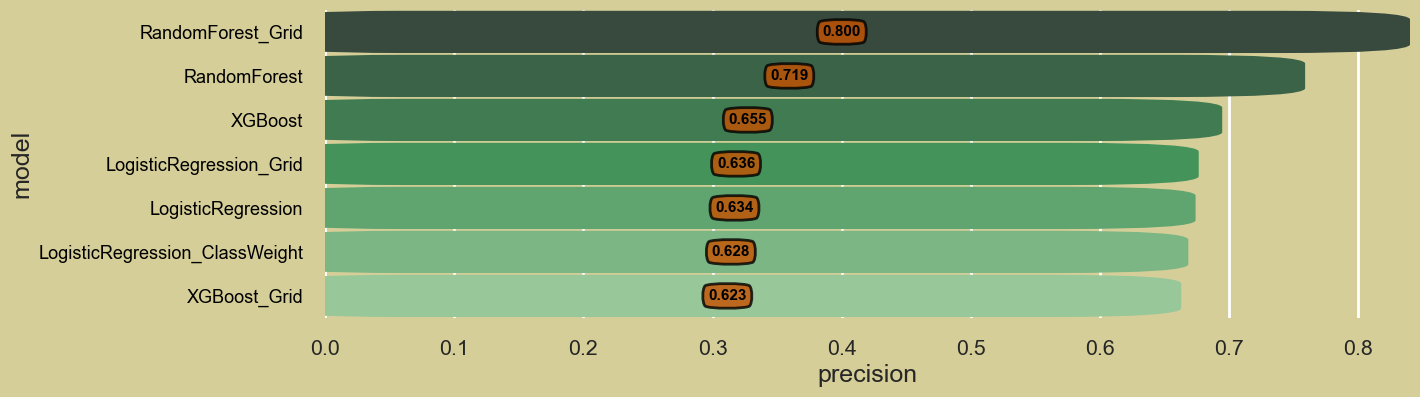

In [159]:
from matplotlib.patches import FancyBboxPatch


plt.figure(figsize=(14,4))

palette = sns.color_palette("Greens_d", len(compare))[::-1]
ax=sns.barplot(x="precision", y="Model", data=compare.sort_values(by="precision", ascending=False), palette=palette)
plt.xlabel('precision', fontsize=18)
plt.ylabel('model', fontsize=18)
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
ax.bar_label(ax.containers[0], fmt="%.3f", label_type='center', 
             fontweight='bold', fontsize=11, color='black', 
             bbox=dict(boxstyle='round4',facecolor='#C65200', alpha=0.8, edgecolor='black', pad=0.4))    
ax.tick_params(axis='y', labelsize=13, labelcolor='black')
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.04,rounding_size=0.1",
                            ec="none", fc=color,
                            mutation_aspect=2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

sns.despine(left=True, bottom=True)

plt.show();

### F1 SCORE RANK

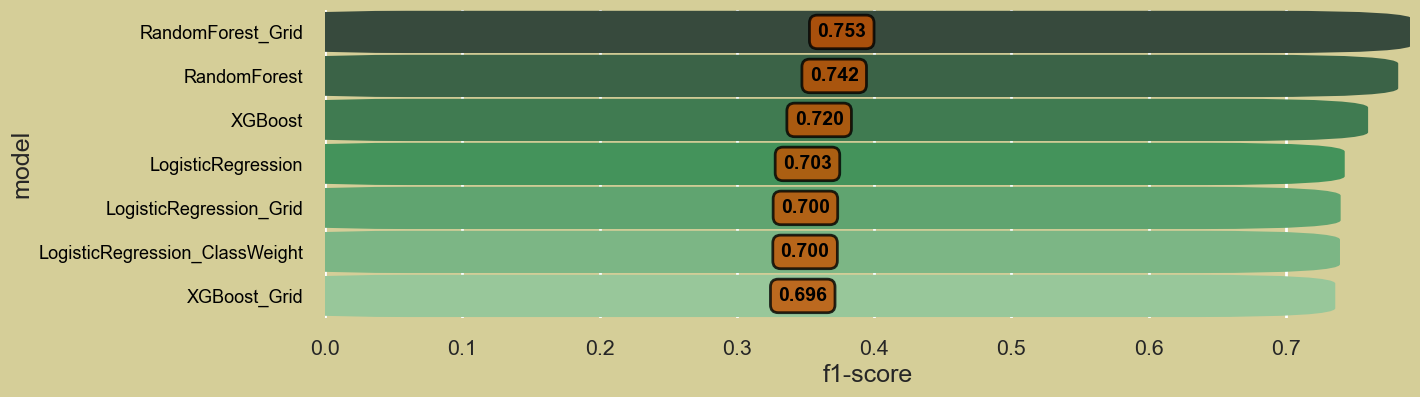

In [160]:
plt.figure(figsize=(14,4))
palette = sns.color_palette("Greens_d", len(compare))[::-1]
ax=sns.barplot(x="f1-score", y="Model", data=compare.sort_values(by="f1-score", ascending=False), palette=palette)
plt.xlabel('f1-score', fontsize=18)
plt.ylabel('model', fontsize=18)
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
ax.bar_label(ax.containers[0], fmt="%.3f", label_type='center', 
             fontweight='bold', fontsize=14, color='black', 
             bbox=dict(boxstyle='round',facecolor='#C65200', alpha=0.8, edgecolor='black', pad=0.4))
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.04,rounding_size=0.1",
                            ec="none", fc=color,
                            mutation_aspect=2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

sns.despine(left=True, bottom=True)
ax.tick_params(axis='y', labelsize=13, labelcolor='black')
plt.show();

### MODEL SELECTION

###### When we closely examine the scores, it appears that XGBoost is the best model by far. Therefore, we will choose this model.

### FEATURE IMPORTANCE FOR XGBOOST MODEL

In [176]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.035)

X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


X_train, y_train = smote.fit_resample(X_train,y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier(max_depth=1)


xgb.fit(X_train, y_train)

[22:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
xgb.feature_importances_

feats = pd.DataFrame(index=X.columns, data=xgb.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)


In [178]:
xgb_imp_feats.reset_index().head(10)

,index,xgb_importance
0,V17,0.378896
1,V14,0.290301
2,V10,0.093299
3,V4,0.039278
4,Amount,0.026568
5,V12,0.024345
6,V21,0.014910
7,V9,0.013185
8,V5,0.009002
9,V23,0.009001


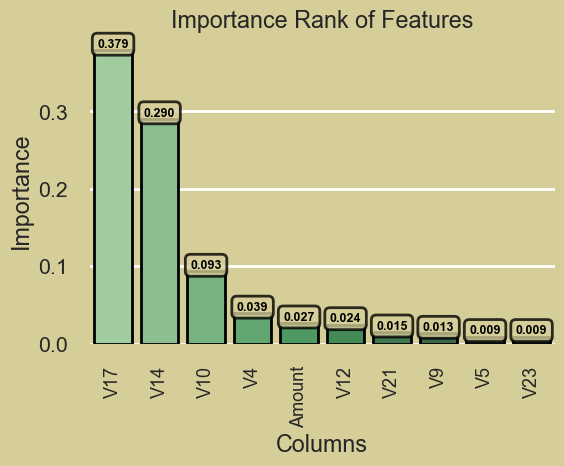

In [179]:
plt.figure(figsize=(6,4))
ax=sns.barplot(xgb_imp_feats.reset_index().head(10),x='index',y='xgb_importance', edgecolor='black', palette='Greens_d')
plt.xticks(rotation=90, fontsize=13)
plt.box(False)
ax.bar_label(ax.containers[0], fmt="%.3f", label_type='edge', 
             fontweight='bold', fontsize=9, color='black', 
             bbox=dict(boxstyle='round',facecolor='#D5CE98', alpha=0.8, edgecolor='black', pad=0.4))
plt.xlabel('Columns')
plt.ylabel('Importance')
plt.title('Importance Rank of Features')
plt.show()

### FINAL MODEL

In [180]:
df_final = df[['V17','V14','V10','V4','Amount','Class']]

In [181]:
X=df_final.drop('Class', axis=1)
y=df_final['Class']

In [184]:
operations=[('smote', SMOTE(sampling_strategy=0.035)),('Scaler', StandardScaler()),('XGBoost', XGBClassifier(max_depth=1)) ]
final_model = Pipeline(steps=operations)

In [185]:
final_model.fit(X,y)

[22:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.035)),
                ('Scaler', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=1, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [198]:
my_dict = {
    "V17": 0.1425,
    "V14": 0.689,
    "V10": -78,
    "V4": -2.18,
    "Amount": 0.14
}

In [199]:
new_obs = pd.DataFrame([my_dict])
new_obs

,V17,V14,V10,V4,Amount
0,0.1425,0.689,-78,-2.18,0.14


In [200]:
final_model.predict(new_obs)

array([0], dtype=int64)

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [201]:
import pickle

filename = 'my_model_fraud'
pickle.dump(final_model, open(filename, 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___